<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
data = pd.read_csv(url)

# Удаление дубликатов
data = data.drop_duplicates()

# Определение признаков и целевой переменной
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']


In [29]:
cat_cols = ['country', 'gender']
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

X_processed = preprocessor.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred)
print(f"Accuracy before PCA: {accuracy_before:.2f}")


Accuracy before PCA: 0.84


In [32]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [33]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_after = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_after:.2f}")


Accuracy after PCA: 0.78


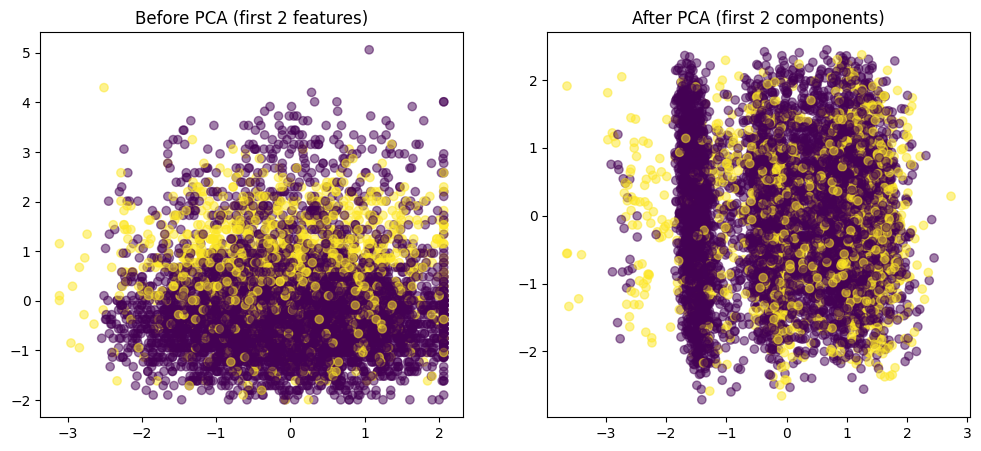

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5)
plt.title('Before PCA (first 2 features)')
plt.subplot(1, 2, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, alpha=0.5)
plt.title('After PCA (first 2 components)')
plt.show()
